#**Assignment 1:** Introduction to Neural Networks

####**Course:** SCC0270-SCC5809 Artificial Neural Networks
####**Professor:** Moacir Antonelli Ponti
####**Assistant:** Sherlon Almeida da Silva

####Obs.: This assignment was adapted from the 3D Graphics Systems course ([here](https://lvelho.impa.br/i3d23/)), proposed by Luiz Velho and Hallison Paz.

---
#**Personal Info:**
*   **Student:**
    *   Giovana Meloni Craveiro
    *   9791264

#**Neural Networks for Function Approximation**

In this assignment you will practice working with the Google Colab environment and PyTorch. You’ll also practice building a Perceptron to fit a function. The goals of this practice are the following:

-   Gain experience setting and using notebooks on Google Colab.
-   Develop familiarity with basic structures of PyTorch: tensors, autograd, modules.
-   Understand neural networks as functions and models for functions approximation.
-   Develop familiarity with the data-driven approach.
-   Train a neural network to fit 1D functions.
-   Use visualization tools to evaluate your result.

# 1. What is an Artificial Neural Network?

## 1.1 Perceptron: the artificial neuron

* Perceptron, [implementação de Thomas Countz](https://www.thomascountz.com/2018/04/05/19-line-line-by-line-python-perceptron)

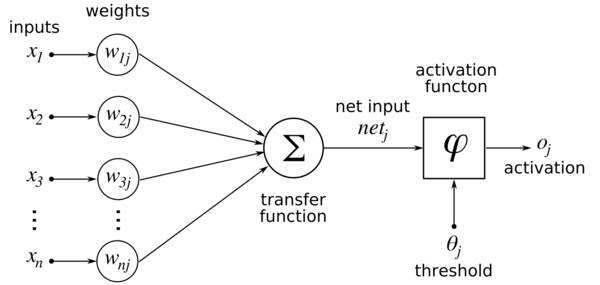

##**Task 1:** (2 pts) Can you implement a Perceptron without using a deep learning specific framework?

i.e. using regular numerical processing libraries such as numpy

In [320]:
import numpy as np
# your perceptron implementation here

class Perceptron():
    # constructor initializes parameters
    def __init__(self, num_inputs, lr=0.01):
       # w - samples of a normal distribution with mean=0 and standard deviation (std) = 1 
       # bias (b) is the first element of the weights array
       self.weights = np.zeros(num_inputs + 1)#
       #self.weights = np.random.normal(0,1, size=(num_inputs+1,1)).reshape(-1) # INITIALIZING WEIGHTS WITH RANDOM VALUES IS UNPREDICTABLE
       #self.weights[0] = 0
        # saves number of classes (at entry layer)
       self.num_inputs = num_inputs
       # saves learning rate (lr)
       self.lr = lr

    def forward(self, inputs):
        #  X*w (matrix multiplication) + b -> bias (b) is the last element of array weights
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0] 
        # binary activation function
        if summation > 0:
            activation_f_result = 1
        else:
            activation_f_result = 0
        return activation_f_result

    # mean of the quadratic loss, also a differentiation function but I'm not using it now
    #def loss(self,y,y_hat):
        # calculates quadratic loss
    #    l = (y_hat - y.reshape(y_hat.shape))**2 / 2
        # returns the mean of the quadratic loss
    #    return l.mean()
    
    def backward(self,input,label):
        estimated_result = self.forward(input) # forward pass
        errors =  (label - estimated_result) # differentiation function (cost) 
        return errors

    def train_step(self,inputs,labels):
        for i in range(inputs.shape[0]):
            error = self.backward(inputs[i], labels[i])
            # gradient descent
            self.weights[1:] += self.lr * error * inputs[i]
            self.weights[0] += self.lr * error

    def train(self,inputs,labels):
        epochs = 100
        for _ in range(epochs):
            self.train_step(inputs,labels)

    def predict(self,inputs):
        return self.forward(inputs)

# linear model Xw + b
my_perceptron = Perceptron(2)


### Validate your Perceptron implementation with Logic Gates **AND** and **OR**.


### AND Logic gate
Validate an AND logic gate to verify its separability using your perceptron implementation.

In [321]:
#Input Data
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
labels = np.array([0,0,0,1])

#Train
nD_inputs = len(inputs[0]) #The dimensionality
and_ = Perceptron(nD_inputs)
and_.train(inputs, labels)
print("Weights:", and_.weights)

Weights: [-0.02  0.02  0.01]


In [322]:
import torch

#Generating sample points between [0, 1] to Test and Plot
n_samples = 10
dimensionality = 2
#test = np.array([[0,0], [0,1], [1,0], [1,1]])  # USED TO VALIDATE RESULTS
test = np.array(torch.rand([n_samples, dimensionality]))

#Test
predictions = []
for i,curr_test in enumerate(test):
  predictions.append(and_.predict(curr_test))
  print("Test:", curr_test, "---> Predicted:", predictions[i])

Test: [0.08924079 0.5709656 ] ---> Predicted: 0
Test: [0.70410097 0.21764976] ---> Predicted: 0
Test: [0.3138461  0.53784204] ---> Predicted: 0
Test: [0.5619688 0.4721464] ---> Predicted: 0
Test: [0.39829558 0.68339056] ---> Predicted: 0
Test: [0.30279857 0.7331069 ] ---> Predicted: 0
Test: [0.66237825 0.7015357 ] ---> Predicted: 1
Test: [0.7795783  0.30740744] ---> Predicted: 0
Test: [0.5046584 0.8801234] ---> Predicted: 0
Test: [0.30256033 0.5223004 ] ---> Predicted: 0


#### Visualize the learned function, as well as the points

### **Task 2:** (1 pt) Modify the following code to color the 1s and 0s as predicted by the network.


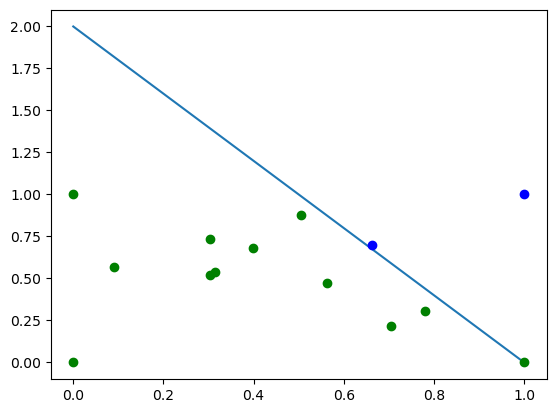

In [323]:
import matplotlib.pyplot as plt
avoid_zero_division = 0.000001

b = and_.weights[0] + avoid_zero_division
a = and_.weights[1] + avoid_zero_division
x = and_.weights[2] + avoid_zero_division

slope = -(b/x)/(b/a) #Coeficiente angular
intercept = -b/x     #Coeficiente linear

#Plot line learned during training
#y = mx + c, m is slope and c is intercept
x1 = 0
y1 = (slope*x1) + intercept

x2 = 1
y2 = (slope*x2) + intercept

plt.plot([x1,x2], [y1,y2])

#Plot train data
for i,curr_data in enumerate(inputs):
  x = curr_data[0]
  y = curr_data[1]
  label = labels[i]

  if label == 1:
    plt.plot(x, y, 'bo')  # Plot 1s in blue
  else:
    plt.plot(x, y, 'go')  # Plot 0s in green

#Plot test data
for i,curr_test in enumerate(test):
  x = curr_test[0]
  y = curr_test[1]
  prediction = predictions[i]

  # Determine which side of the line the point falls on
  if prediction == 1:
    plt.plot(x, y, 'bo')  # Plot 1s in blue
  else:
    plt.plot(x, y, 'go')  # Plot 0s in green
  
plt.show()

### OR Logic gate
Validate an OR logic gate to verify its separability using your perceptron implementation.

In [324]:
#Input Data OR
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
labels = np.array([0,1,1,1])

#Train
nD_inputs = len(inputs[0]) #The dimensionality
or_ = Perceptron(nD_inputs)
or_.train(inputs, labels)
print("Weights:", or_.weights)

Weights: [0.   0.01 0.01]


In [330]:
import torch

#Generating sample points between [0, 1] to Test and Plot
n_samples = 10
dimensionality = 2
test = np.array([[0,0], [0,1], [1,0], [1,1]])
#test = np.array(torch.rand([n_samples, dimensionality]))

#Test
predictions = []
for i,curr_test in enumerate(test):
  predictions.append(or_.predict(curr_test))
  print("Test:", curr_test, "---> Predicted:", predictions[i])

Test: [0 0] ---> Predicted: 0
Test: [0 1] ---> Predicted: 1
Test: [1 0] ---> Predicted: 1
Test: [1 1] ---> Predicted: 1


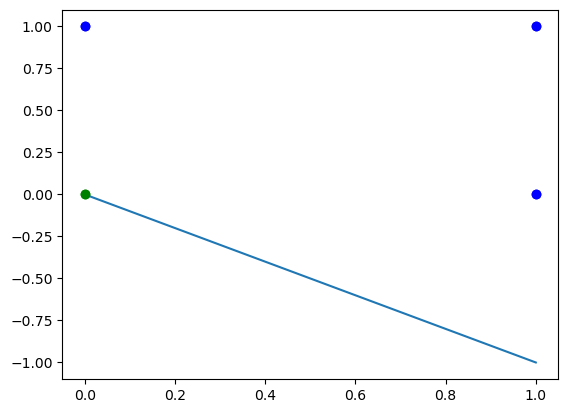

In [332]:
import matplotlib.pyplot as plt
avoid_zero_division = 0.000001

b = or_.weights[0] + avoid_zero_division
a = or_.weights[1] + avoid_zero_division
x = or_.weights[2] + avoid_zero_division

slope = -(b/x)/(b/a) #Coeficiente angular
intercept = -b/x     #Coeficiente linear

#Plot line learned during training
#y = mx + c, m is slope and c is intercept
x1 = 0
y1 = (slope*x1) + intercept

x2 = 1
y2 = (slope*x2) + intercept

plt.plot([x1,x2], [y1,y2])

#Plot train data
for i,curr_data in enumerate(inputs):
  x = curr_data[0]
  y = curr_data[1]
  label = labels[i]

  if label == 1:
    plt.plot(x, y, 'bo')  # Plot 1s in blue
  else:
    plt.plot(x, y, 'go')  # Plot 0s in green

#Plot test data
for i,curr_test in enumerate(test):
  x = curr_test[0]
  y = curr_test[1]
  prediction = predictions[i]

  # Determine which side of the line the point falls on
  if prediction == 1:
    plt.plot(x, y, 'bo')  # Plot 1s in blue
  else:
    plt.plot(x, y, 'go')  # Plot 0s in green
  
plt.show()

## 1.2 Multilayer Perceptron

Multilayer Perceptron is a fully connected class of neural networks which presents multiple perceptrons connected in a computational graph that "flows" from inputs to outputs.

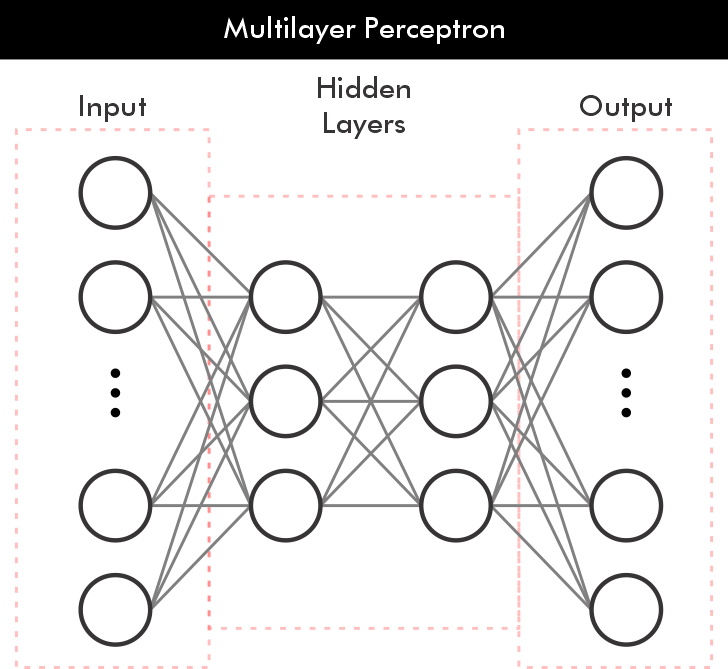

# 2. How can we build a MLP network in PyTorch?

In [333]:
import torch
import numpy as np
from torch import nn

In [400]:
class LineNetwork(nn.Module):
  # Initialization
  def __init__(self):
    super().__init__()
    # a single perceptron
    self.layers = nn.Sequential(
        nn.Linear(1, 1),
        # nn.ReLU(),
    )

  # how the network operates
  def forward(self, x):
    return self.layers(x)

# 3. How can we train a neural network?

Let's train our network to regress a simple affine function. A single Perceptron should be able to approximate a line, right?

## 3.1 Preparing the data infrastructure

In [388]:
from torch.utils.data import Dataset, DataLoader
import torch.distributions.uniform as urand

In [389]:
# This is a Dataset class to work with PyTorch
class AlgebraicDataset(Dataset):
  '''Abstraction for a dataset of a 1D function'''

  def __init__(self, f, interval, nsamples):
    X = urand.Uniform(interval[0], interval[1]).sample([nsamples, 1]) # changed from [nsamples] to [nsamples, 1]
    self.data = [(x, f(x)) for x in X]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

In [390]:
# we need a function
line = lambda x: 2*x + 3
# a domain for our function
interval = (-10, 10)
# the number of points we are going to sample for training
train_nsamples = 1000
# the number of points we are going to evaluate our model on
test_nsamples = 100

In [391]:
train_dataset = AlgebraicDataset(line, interval, train_nsamples)
test_dataset  = AlgebraicDataset(line, interval, test_nsamples)

train_dataloader = DataLoader(train_dataset, batch_size=train_nsamples, shuffle=True)
test_dataloader  = DataLoader(test_dataset, batch_size=test_nsamples, shuffle=True)

# 3.2 Hyperparameters for Optimization

In [392]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"running on {device}")

running on cpu


In [393]:
model = LineNetwork().to(device) #Aloca memória na GPU e copia os dados para lá.

In [394]:
# Loss Function: Mean Squared Error
lossfunc = nn.MSELoss()

# SGD = Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

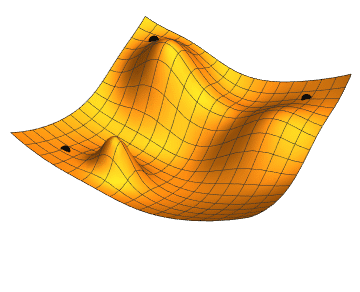

## **Task 4**: (5 pts) implement the functions that allow training and testing the model

In [395]:

def train(model, dataloader, lossfunc, optimizer):  
    total_loss = 0.0

    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device) # guarantees that both the data and the model are on the same device (either CPU or GPU) in this case "cuda" if available, else "cpu"
        optimizer.zero_grad() # Zero the gradients       
        outputs = model(inputs) # Forward pass
        loss = lossfunc(outputs, targets) # Calculate the loss
        loss.backward() # Backpropagation
        optimizer.step() 
        total_loss += loss.item()
    return total_loss

def test(model, dataloader, lossfunc):
    model.eval()
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)  # guarantees that both the data and the model are on the same device (either CPU or GPU) in this case "cuda" if available, else "cpu"
            outputs = model(inputs) # prediction
            loss = lossfunc(outputs, targets) # Calculate the loss
    return loss


# 3.3 Training the network



In [396]:
# for visualization
import imageio
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

In [397]:
# Function to visualize results (to be used later in the notebook)
def plot_comparison(f, model, interval=(-10, 10), nsamples=10, return_array=True, epoc="None", loss="None"):
  fig, ax = plt.subplots(figsize=(10, 10))

  ax.grid(True, which='both')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  samples = np.linspace(interval[0], interval[1], nsamples)
  model.eval()
  with torch.no_grad():
    pred = model(torch.tensor(samples).unsqueeze(1).float().to(device))

  ax.plot(samples, list(map(f, samples)), "o", label="ground truth")
  ax.plot(samples, pred.cpu(), label="model")
  #print(samples, pred.cpu())
  plt.title(f"Epochs: {epoc}, Loss: {loss:.4f}")
  plt.legend()
  plt.show()
  # to return image as numpy array
  if return_array:
    fig.canvas.draw()
    img_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    return img_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))

Epoch: 0; Train Loss: 66.22545623779297


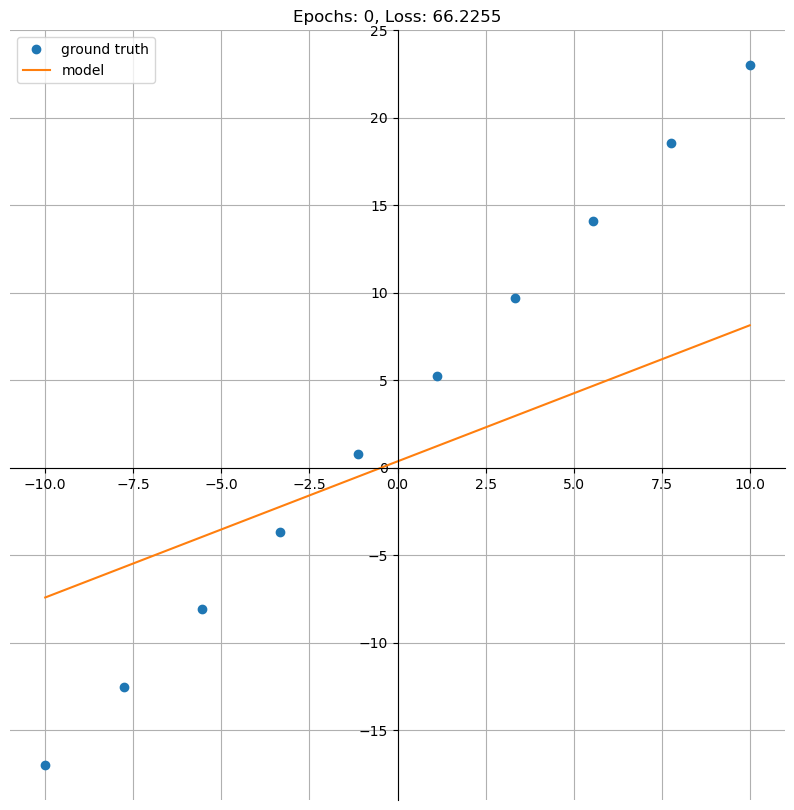

Epoch: 25; Train Loss: 8.06960678100586


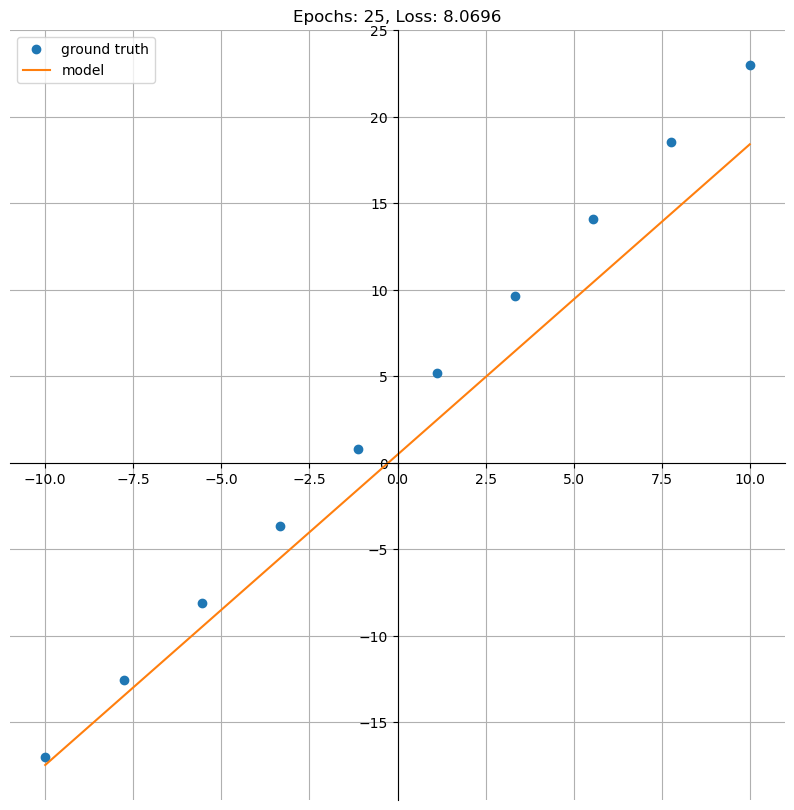

Epoch: 50; Train Loss: 5.822732448577881


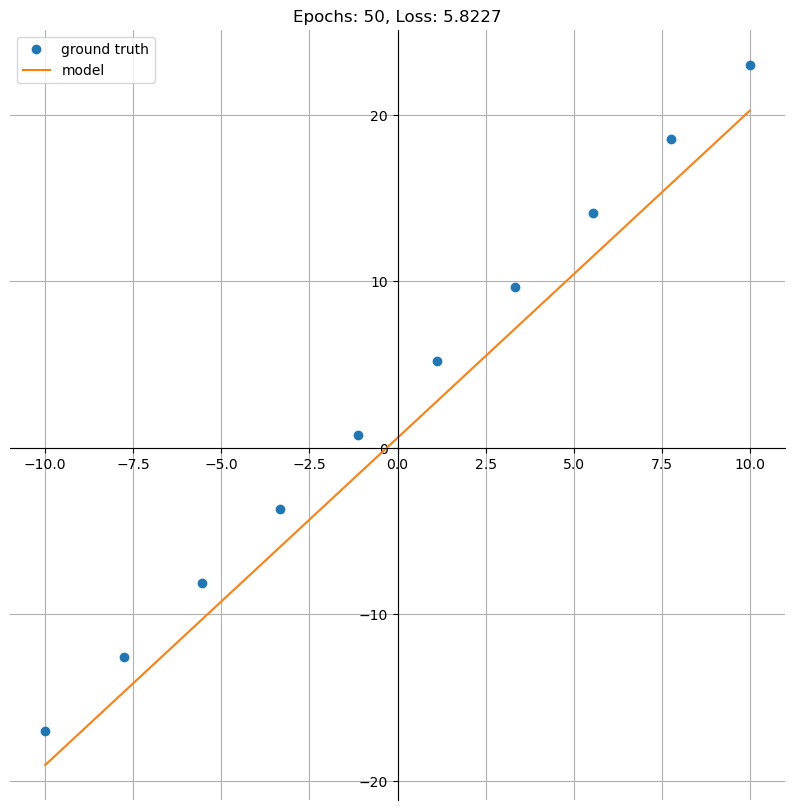

Epoch: 75; Train Loss: 5.225955009460449


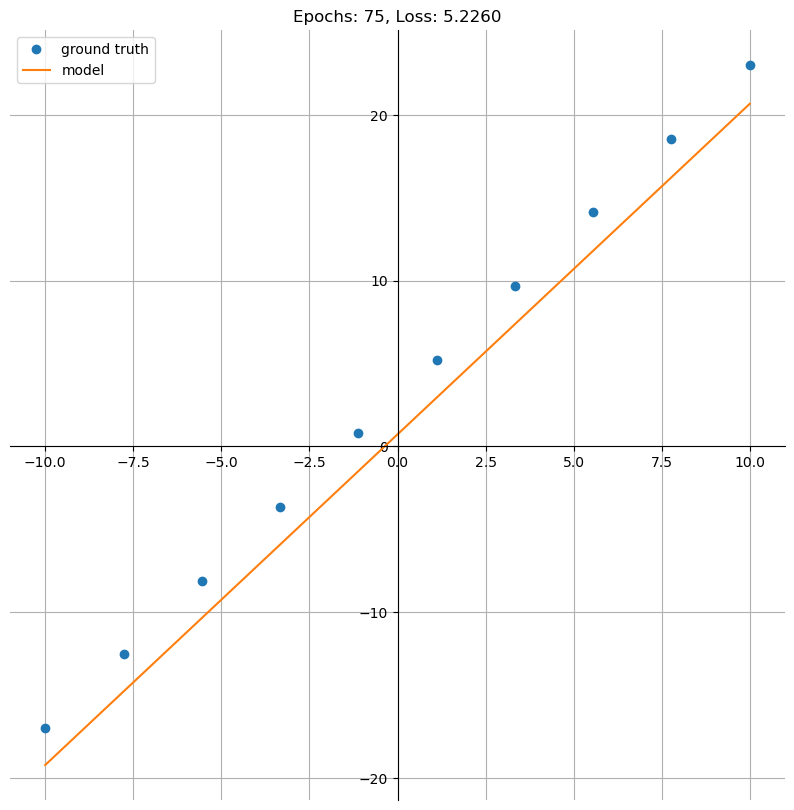

Epoch: 100; Train Loss: 4.726964950561523


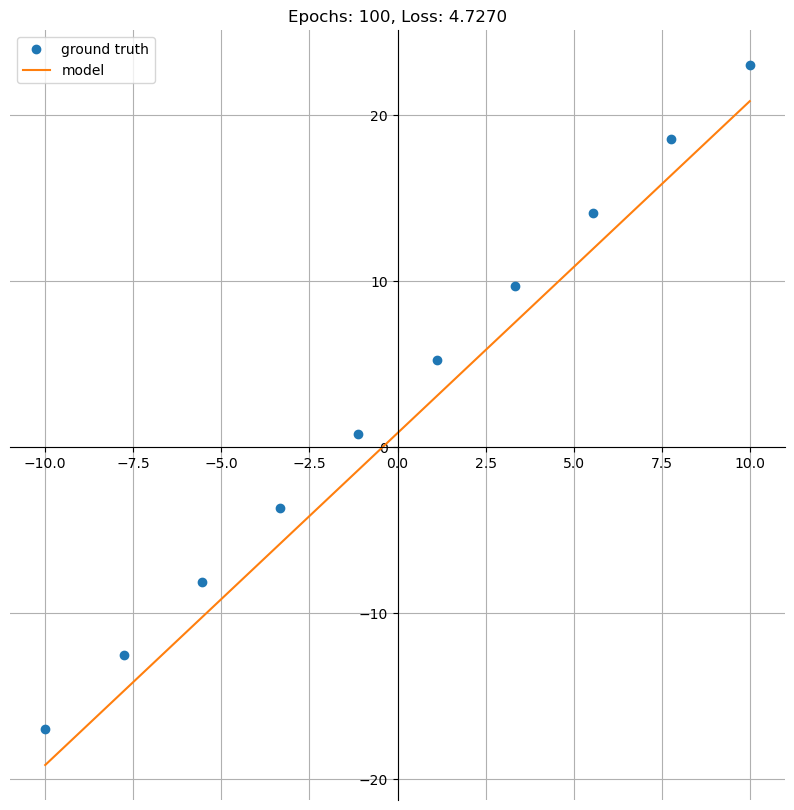

Epoch: 125; Train Loss: 4.276672840118408


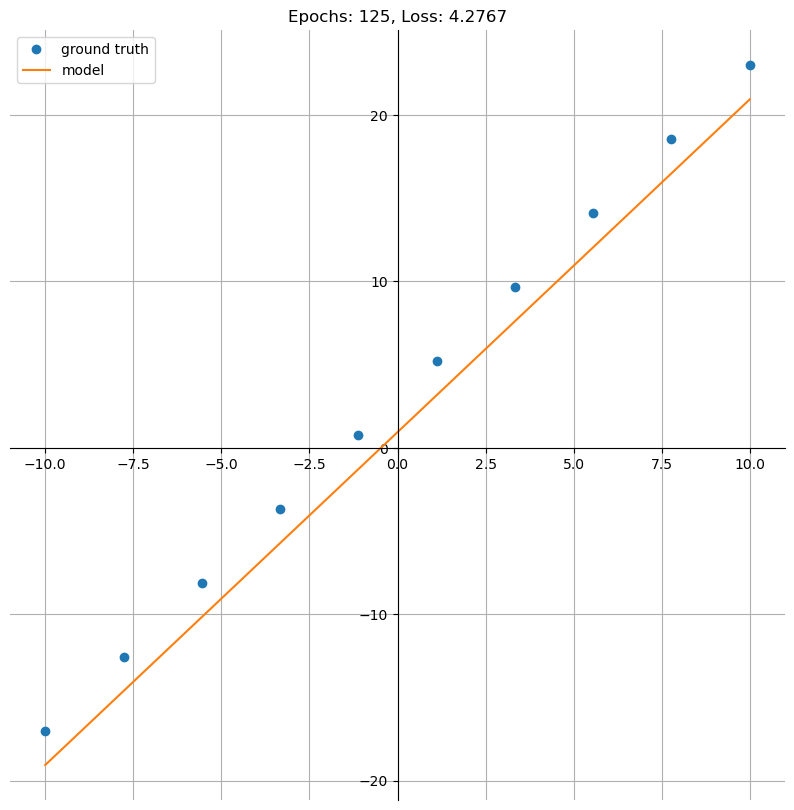

Epoch: 150; Train Loss: 3.8693037033081055


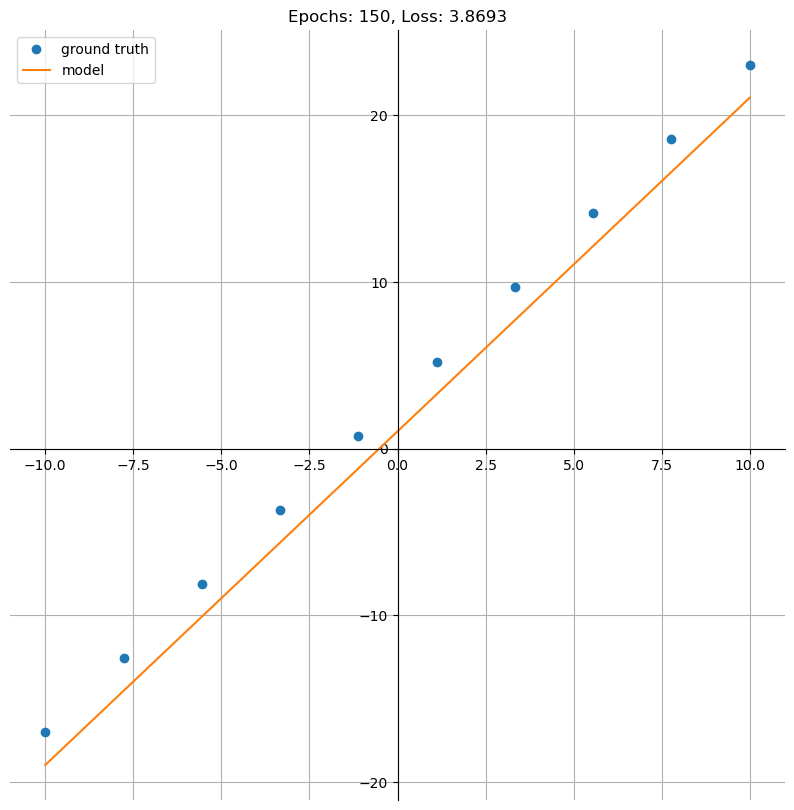

Epoch: 175; Train Loss: 3.5007410049438477


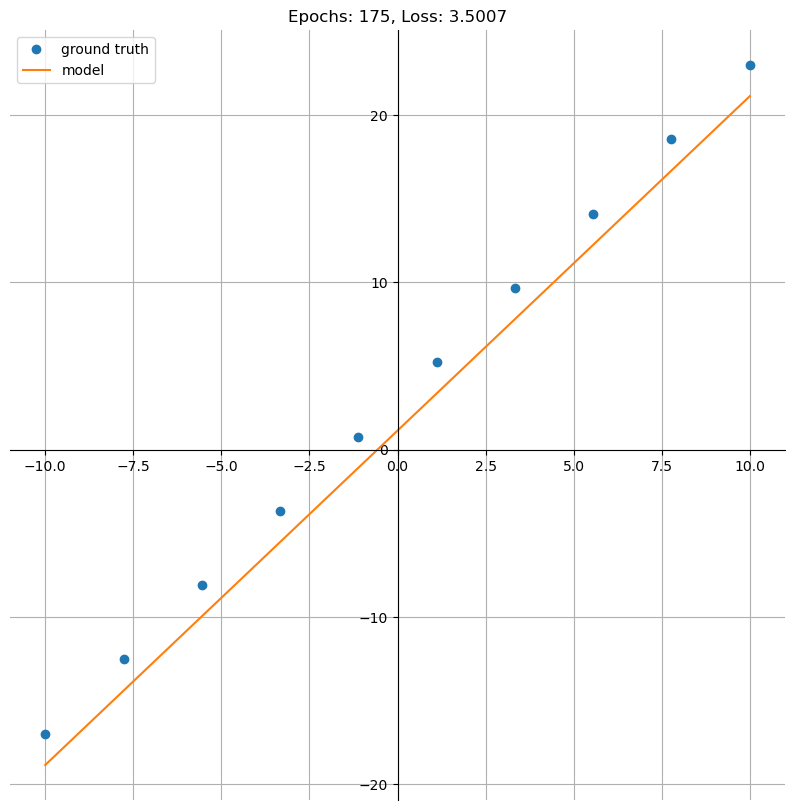

Epoch: 200; Train Loss: 3.167283773422241


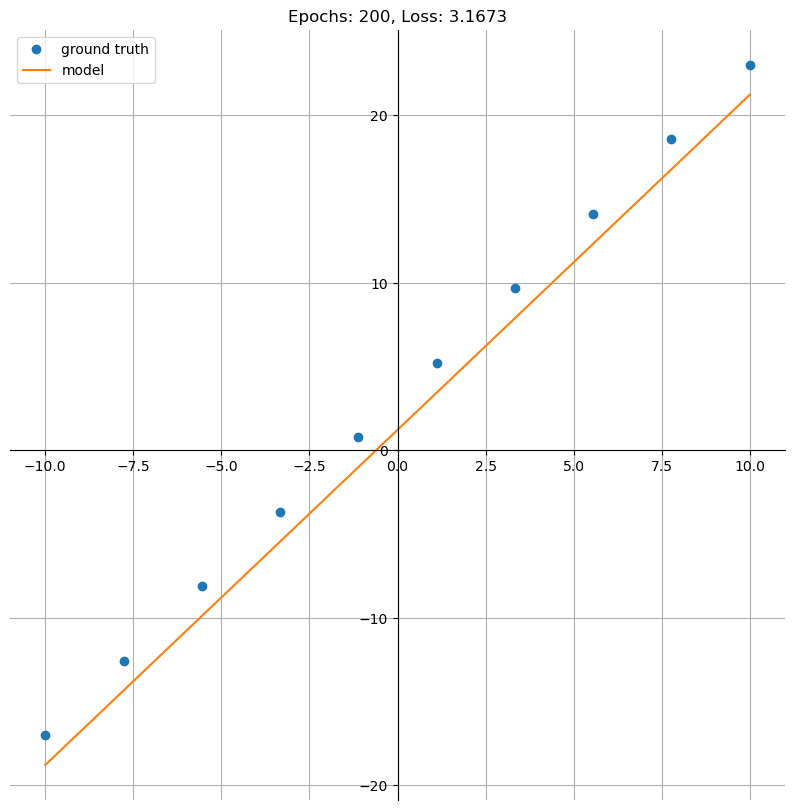

Epoch: 225; Train Loss: 2.8655905723571777


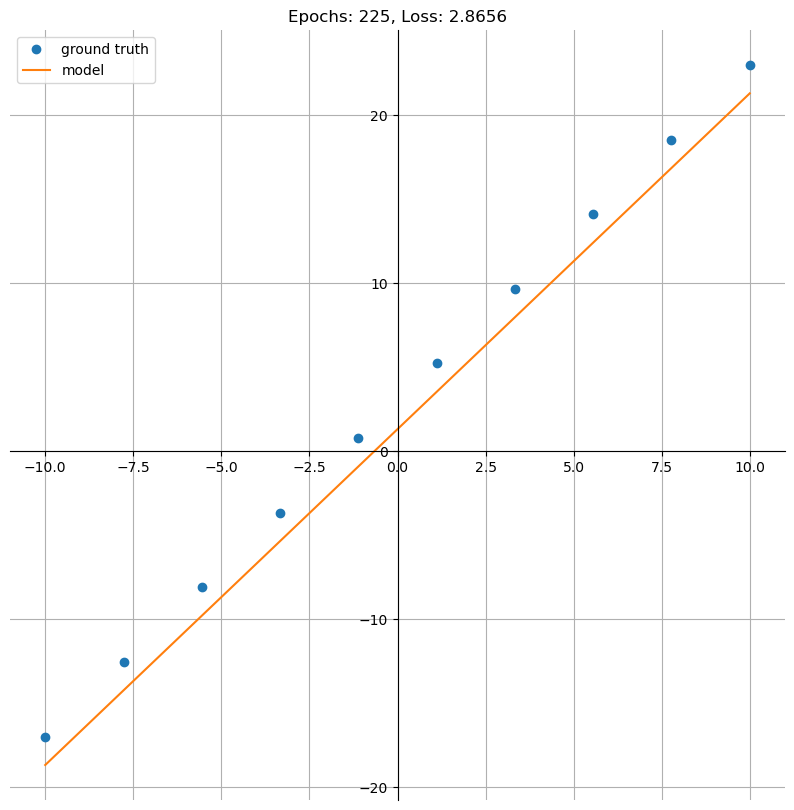

Epoch: 250; Train Loss: 2.592634677886963


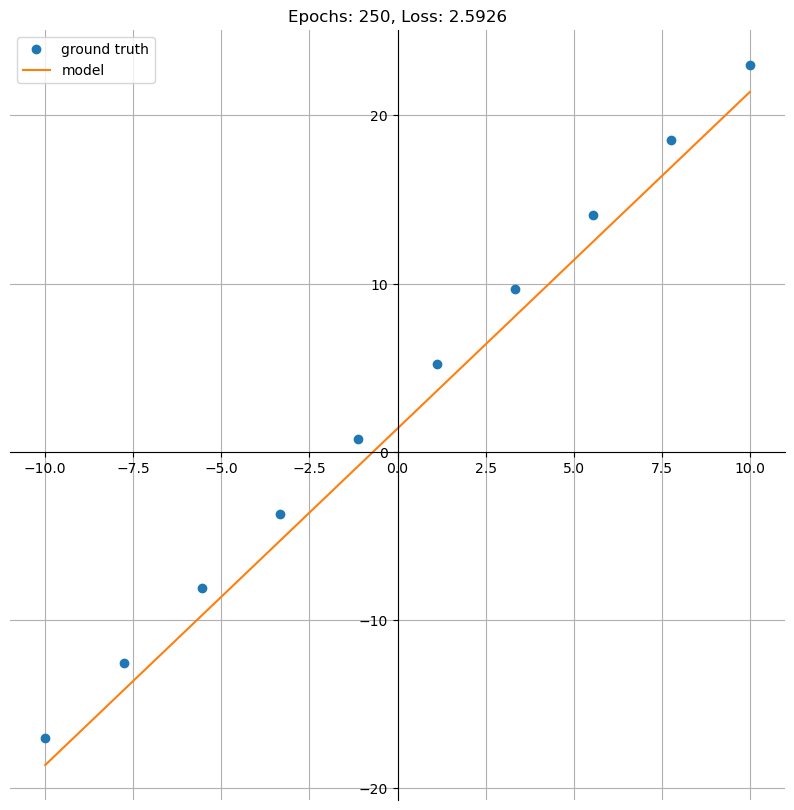

Epoch: 275; Train Loss: 2.3456780910491943


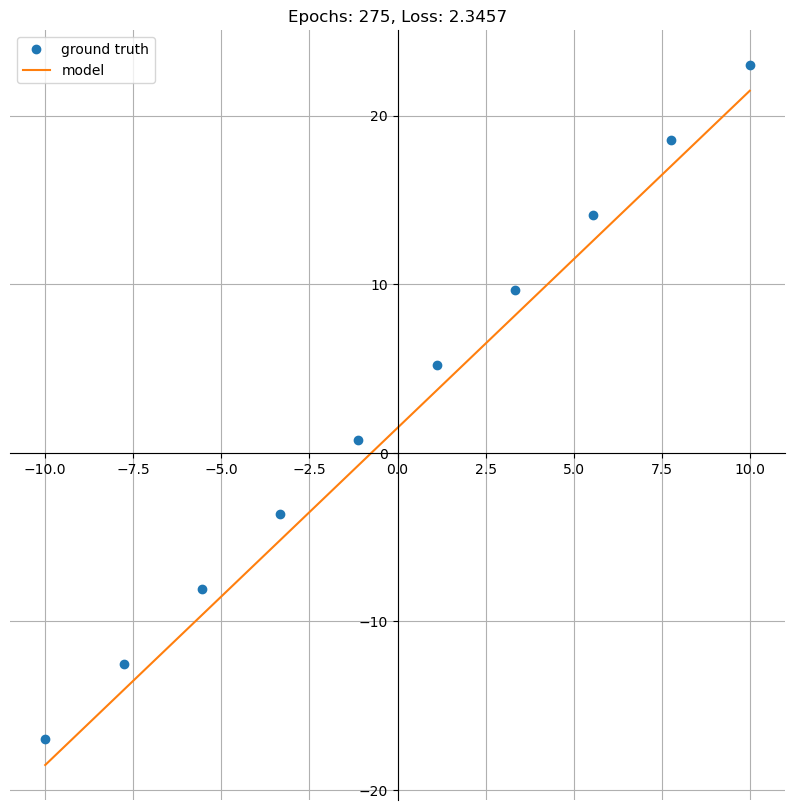

Epoch: 300; Train Loss: 2.1222448348999023


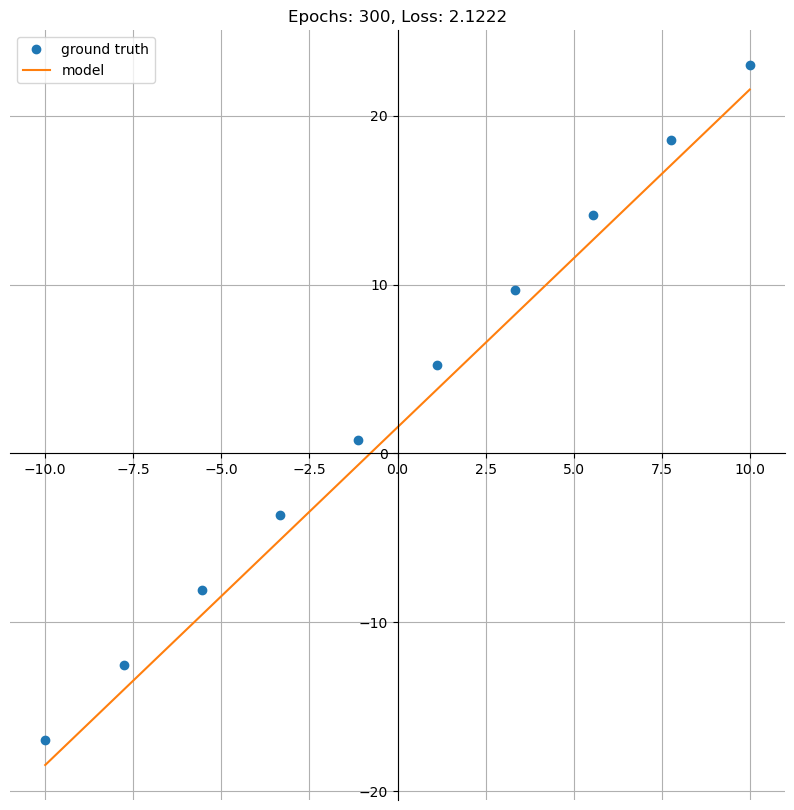

Epoch: 325; Train Loss: 1.9200944900512695


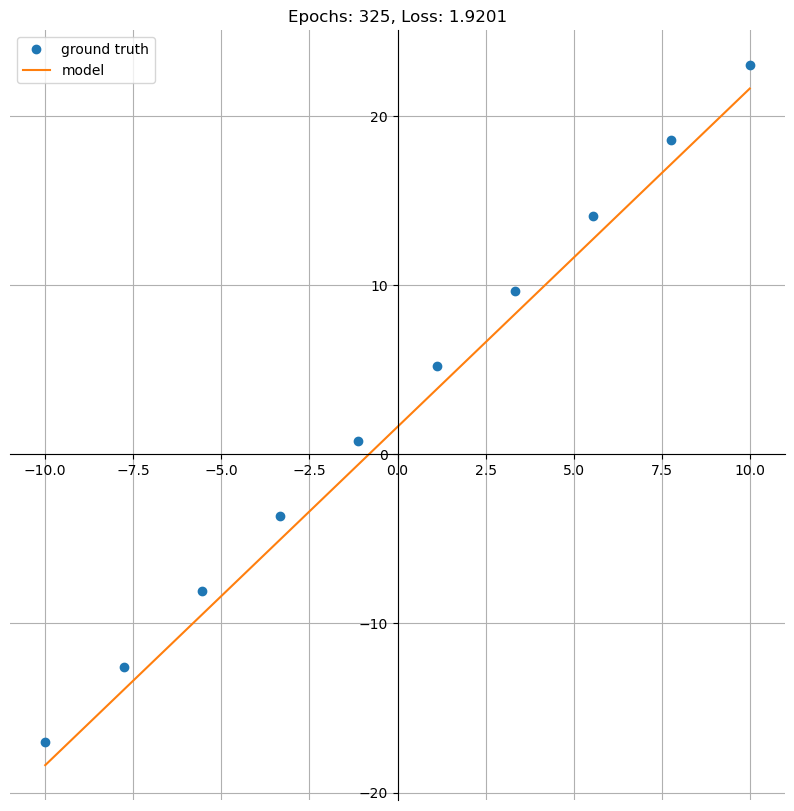

Epoch: 350; Train Loss: 1.7371995449066162


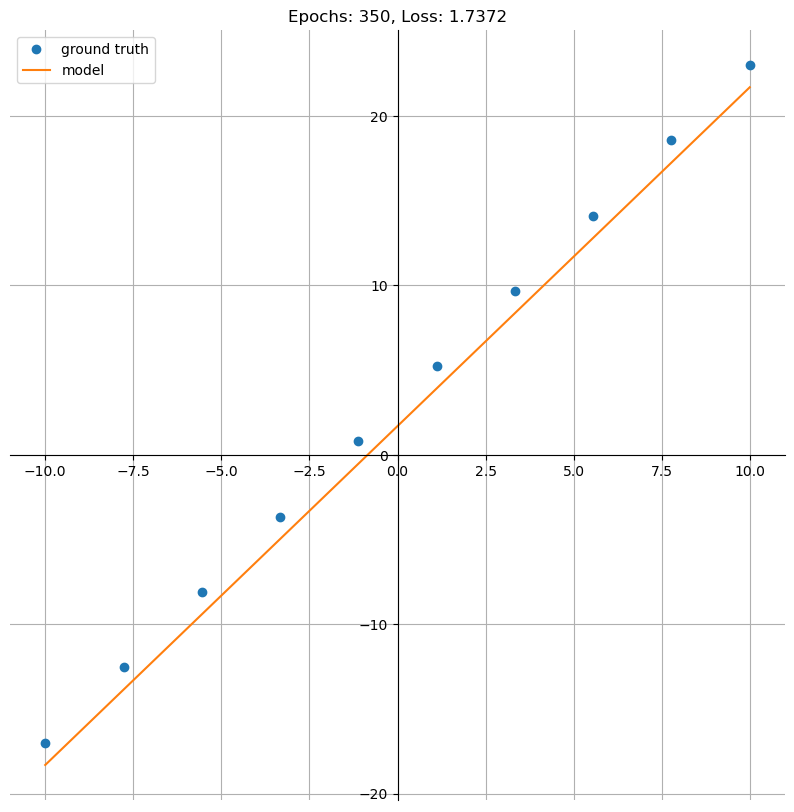

Epoch: 375; Train Loss: 1.571725606918335


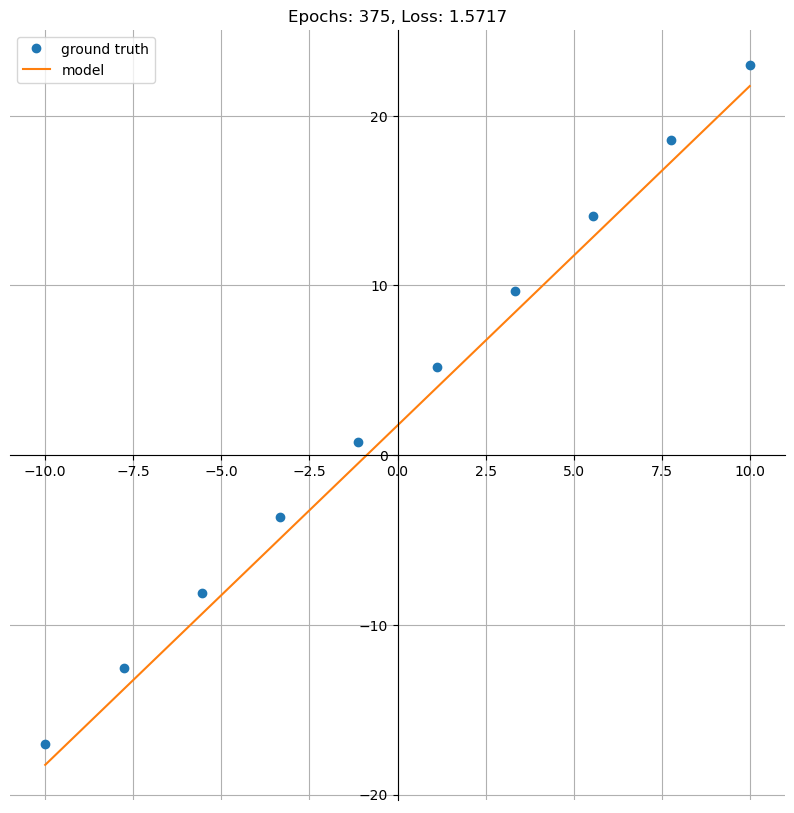

Epoch: 400; Train Loss: 1.4220134019851685


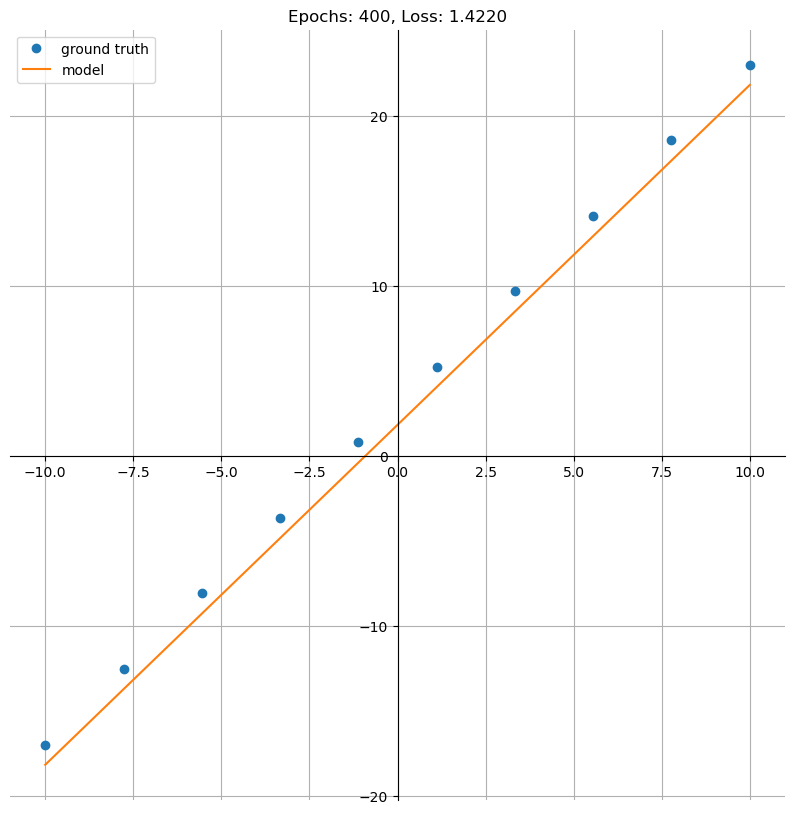

Epoch: 425; Train Loss: 1.2865617275238037


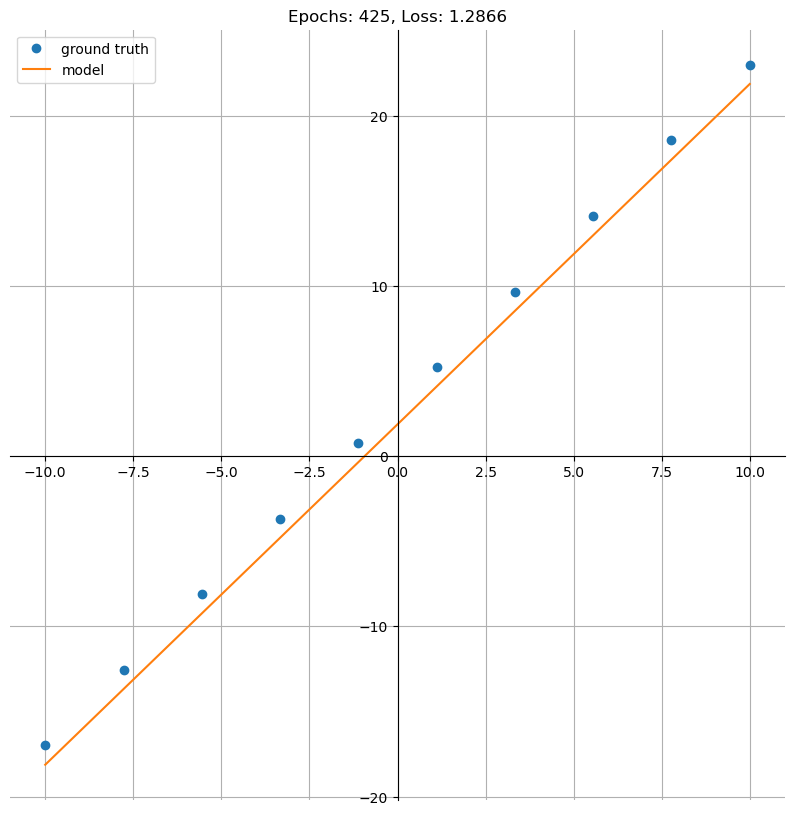

Epoch: 450; Train Loss: 1.1640126705169678


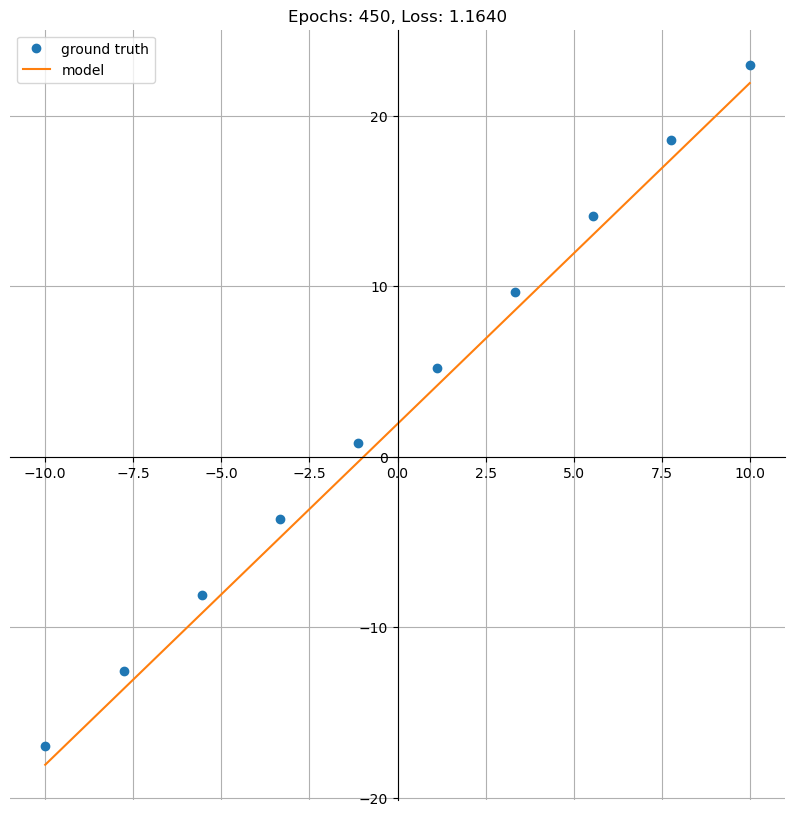

Epoch: 475; Train Loss: 1.0531362295150757


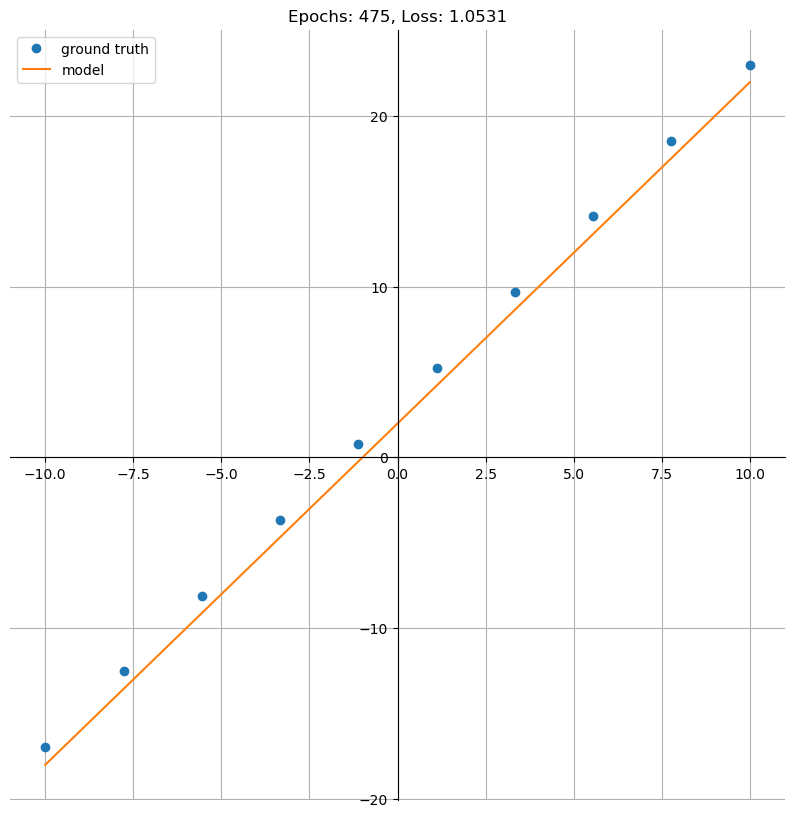

Epoch: 500; Train Loss: 0.9528212547302246


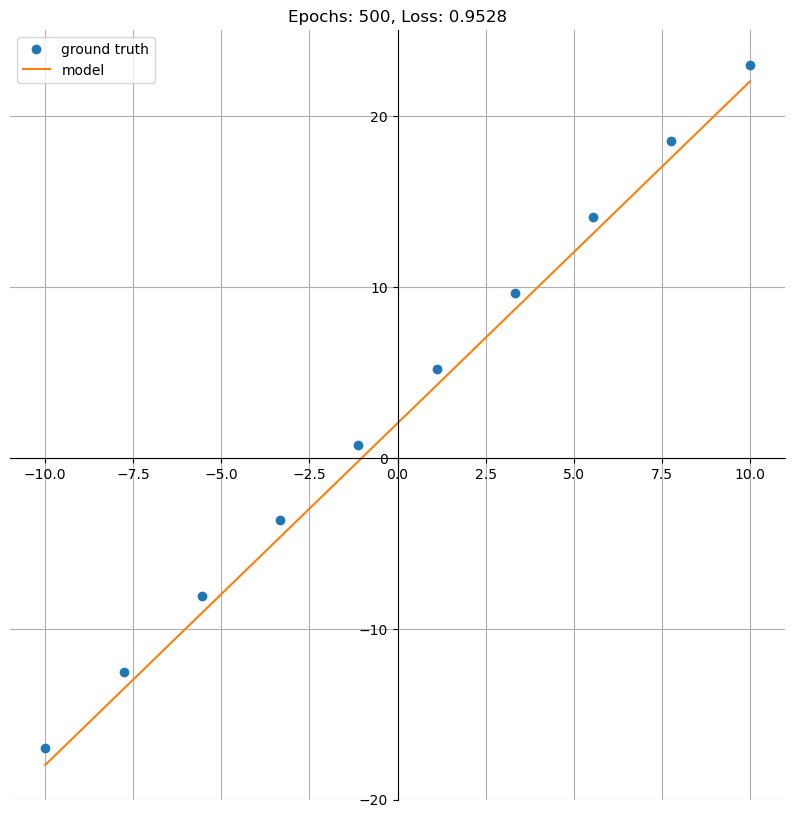

Epoch: 525; Train Loss: 0.8620619177818298


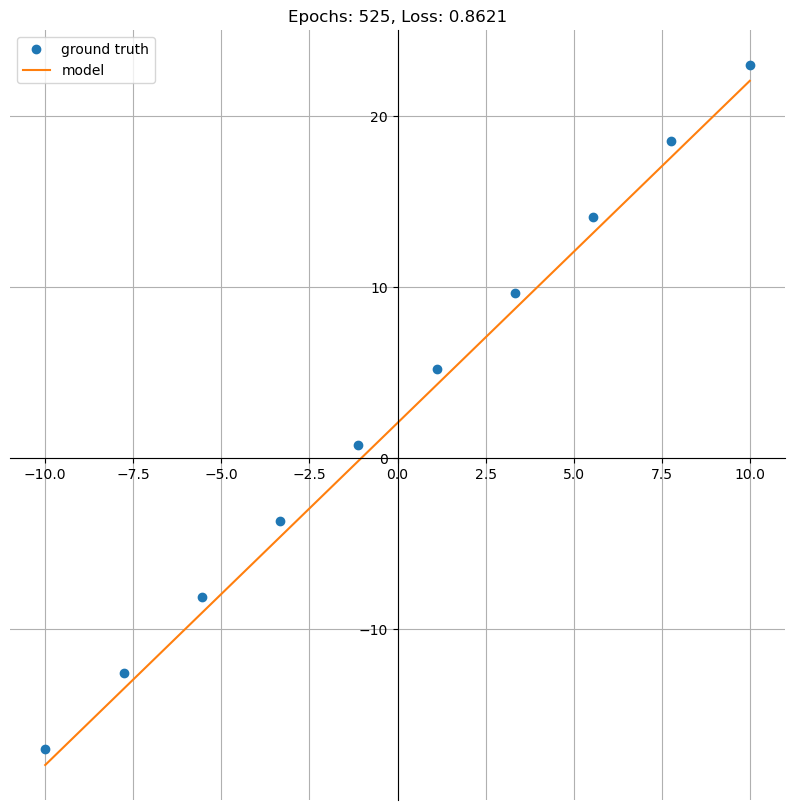

Epoch: 550; Train Loss: 0.7799474000930786


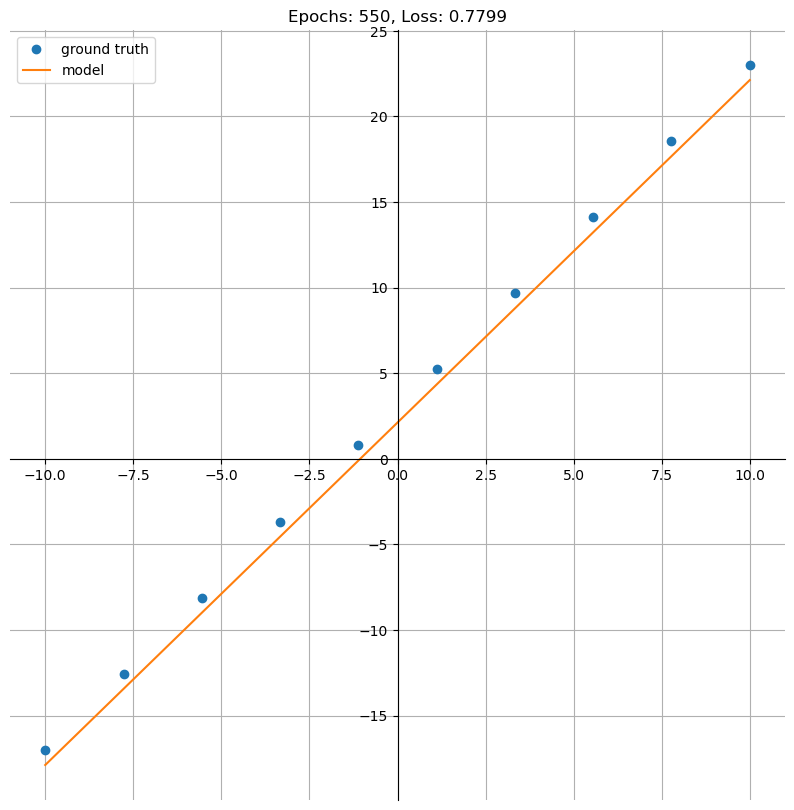

Epoch: 575; Train Loss: 0.7056546807289124


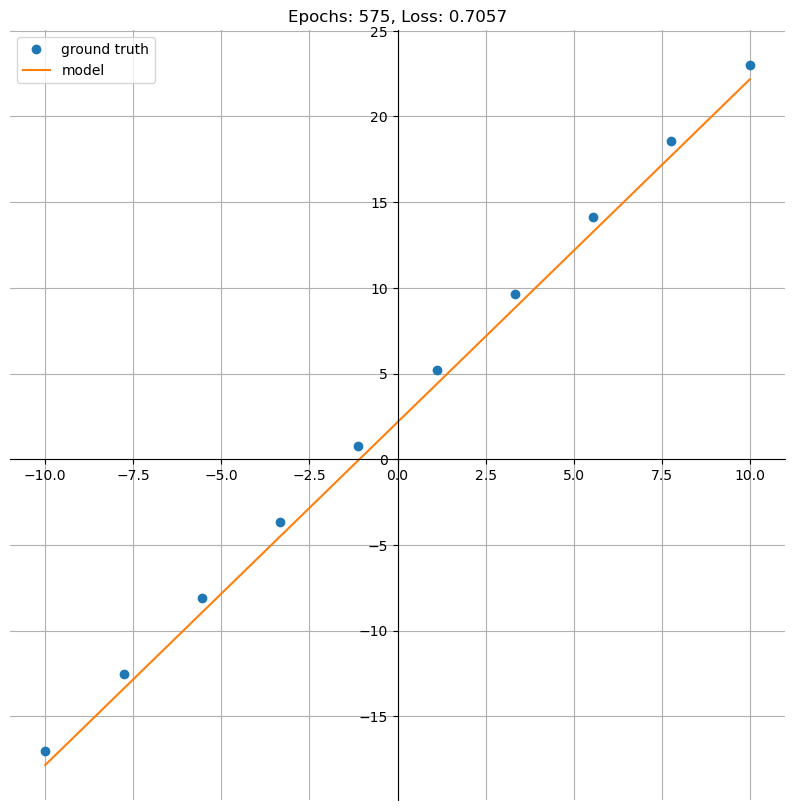

Epoch: 600; Train Loss: 0.6384373307228088


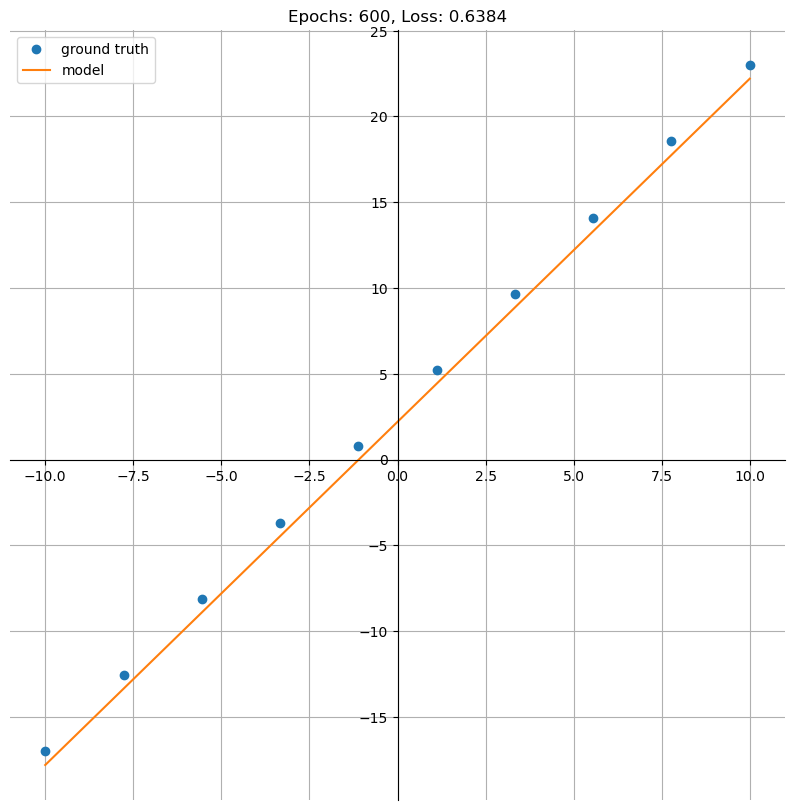

Epoch: 625; Train Loss: 0.577624499797821


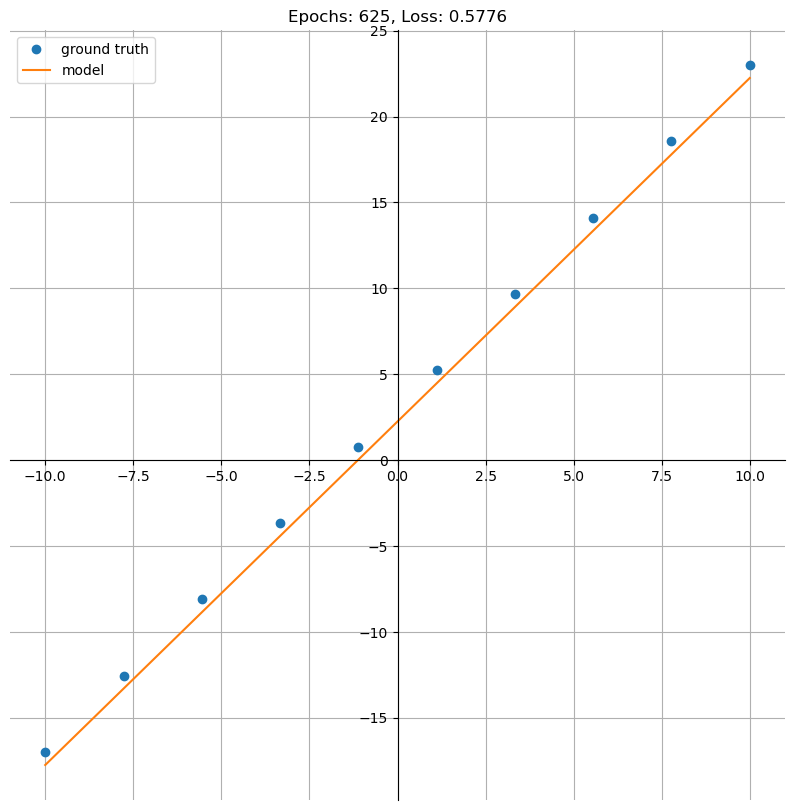

Epoch: 650; Train Loss: 0.5226040482521057


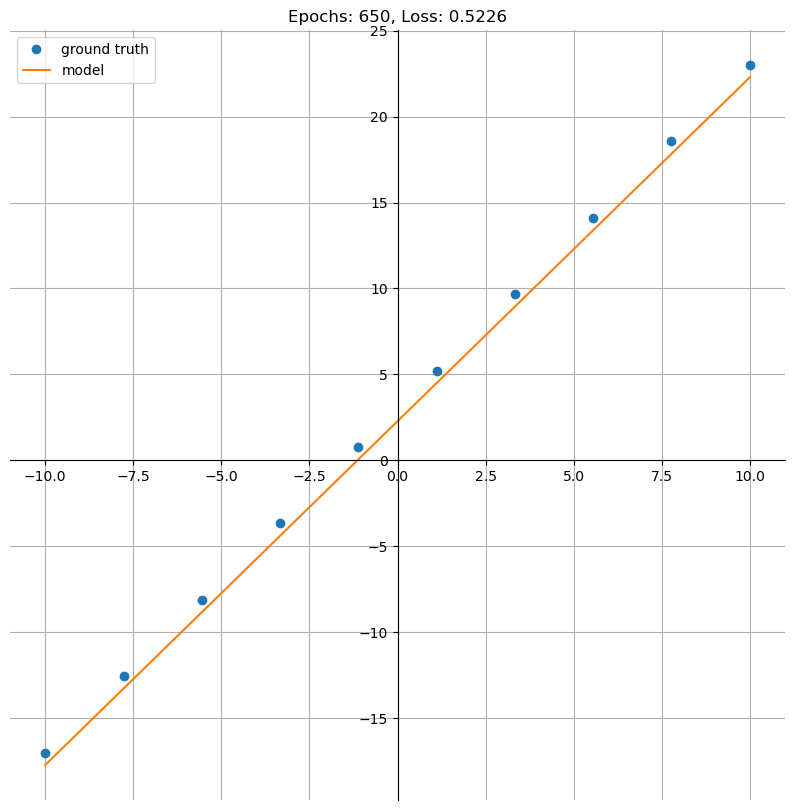

Epoch: 675; Train Loss: 0.4728240668773651


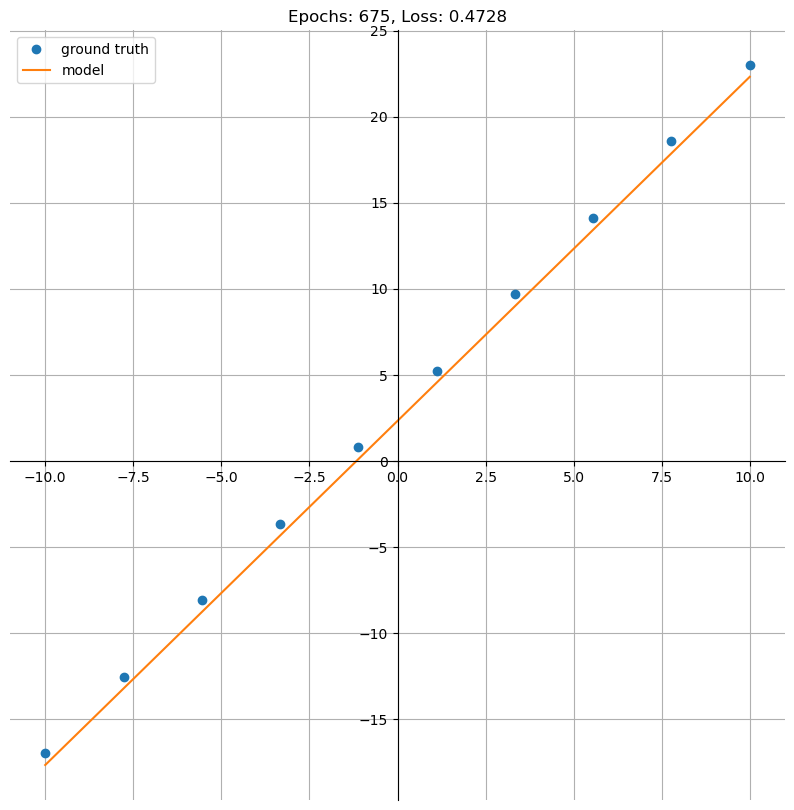

Epoch: 700; Train Loss: 0.42778506875038147


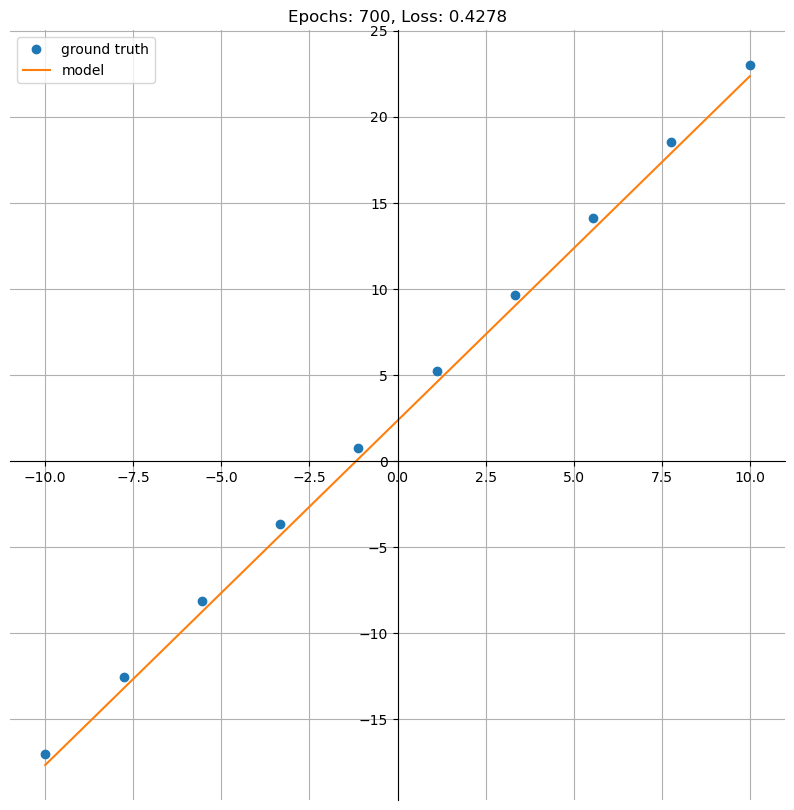

Epoch: 725; Train Loss: 0.3870370090007782


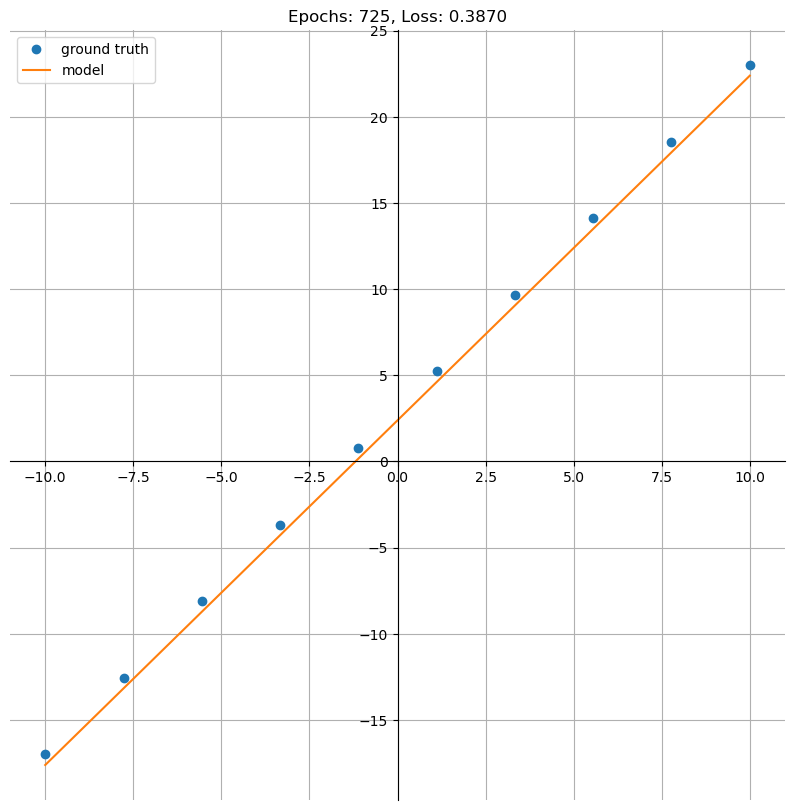

Epoch: 750; Train Loss: 0.35017043352127075


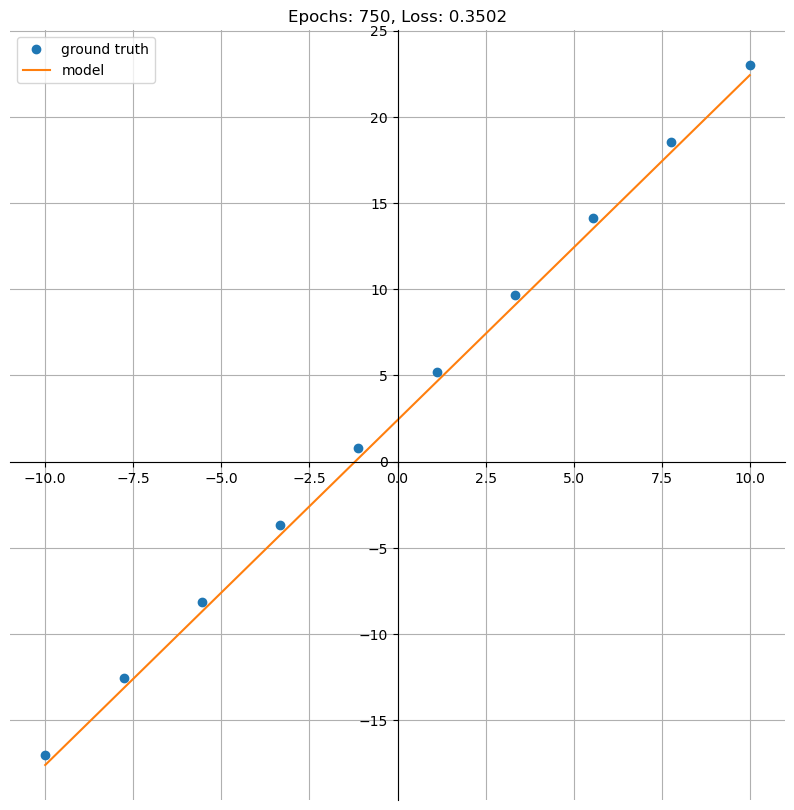

Epoch: 775; Train Loss: 0.31681573390960693


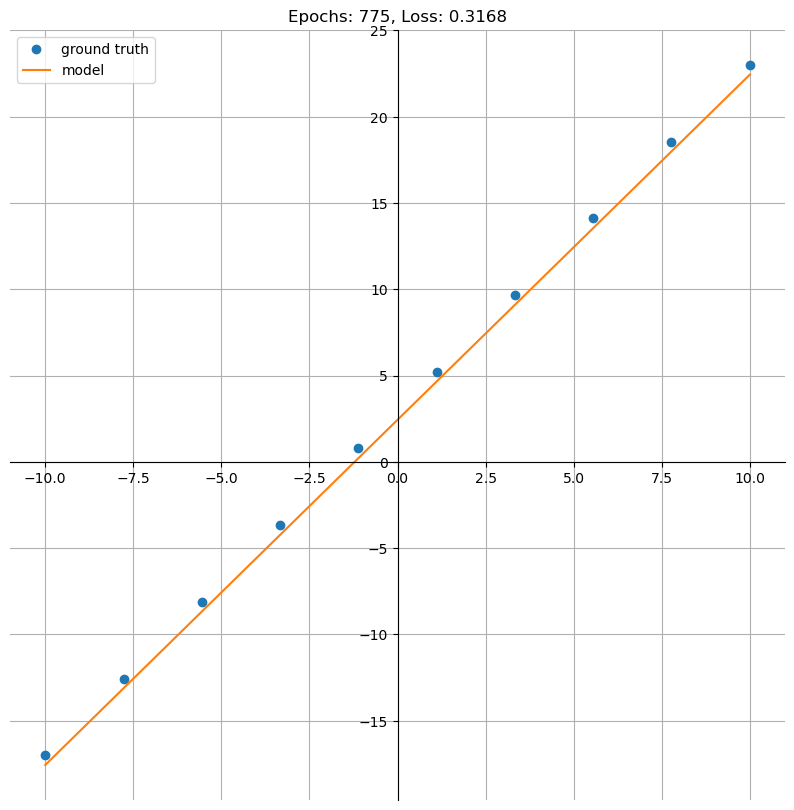

Epoch: 800; Train Loss: 0.28663793206214905


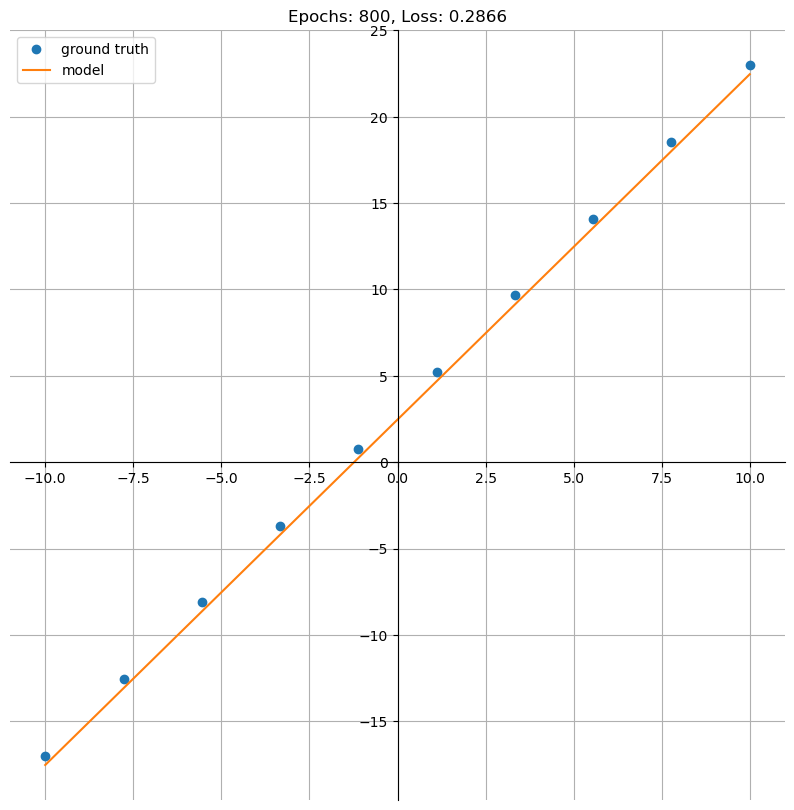

Epoch: 825; Train Loss: 0.25933459401130676


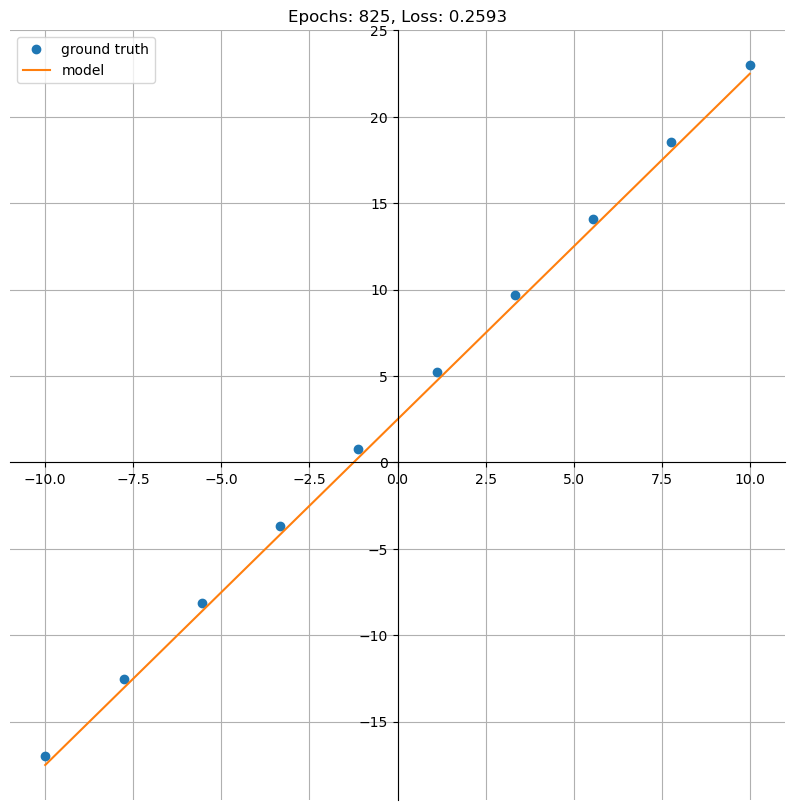

Epoch: 850; Train Loss: 0.23463241755962372


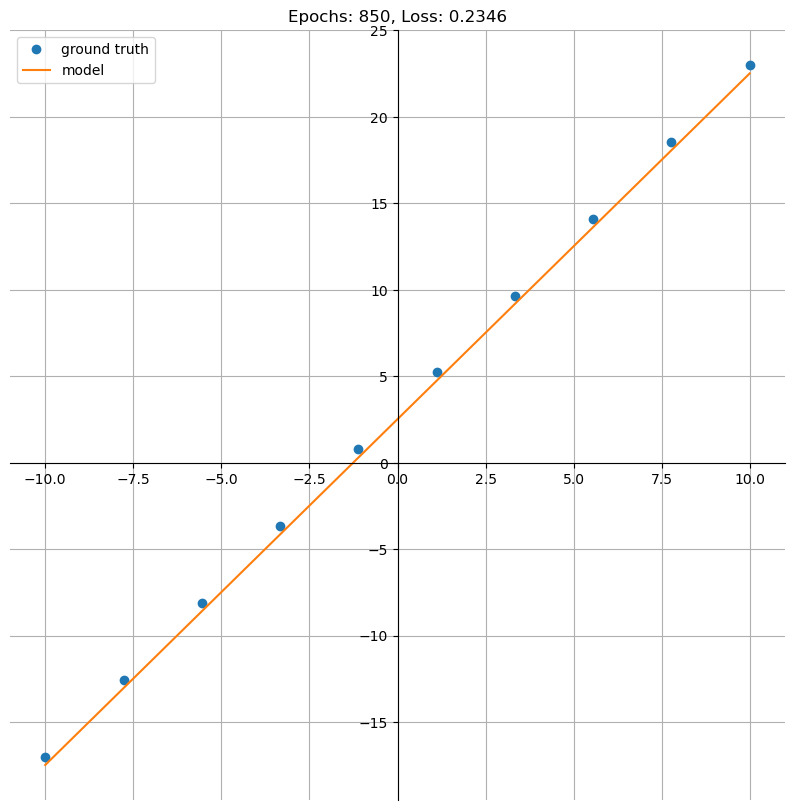

Epoch: 875; Train Loss: 0.21228289604187012


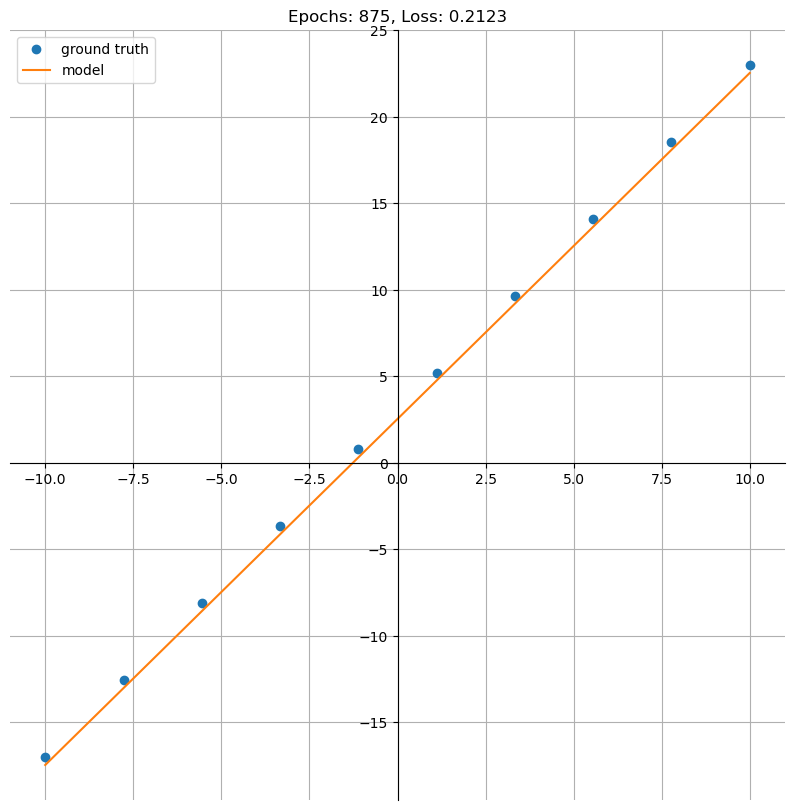

Epoch: 900; Train Loss: 0.19206233322620392


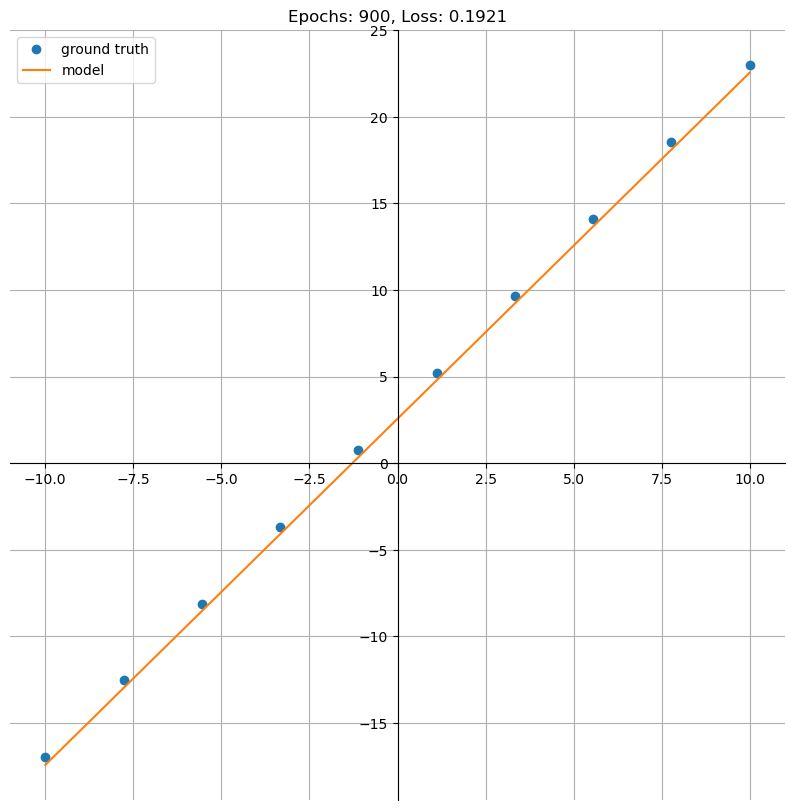

Epoch: 925; Train Loss: 0.1737678498029709


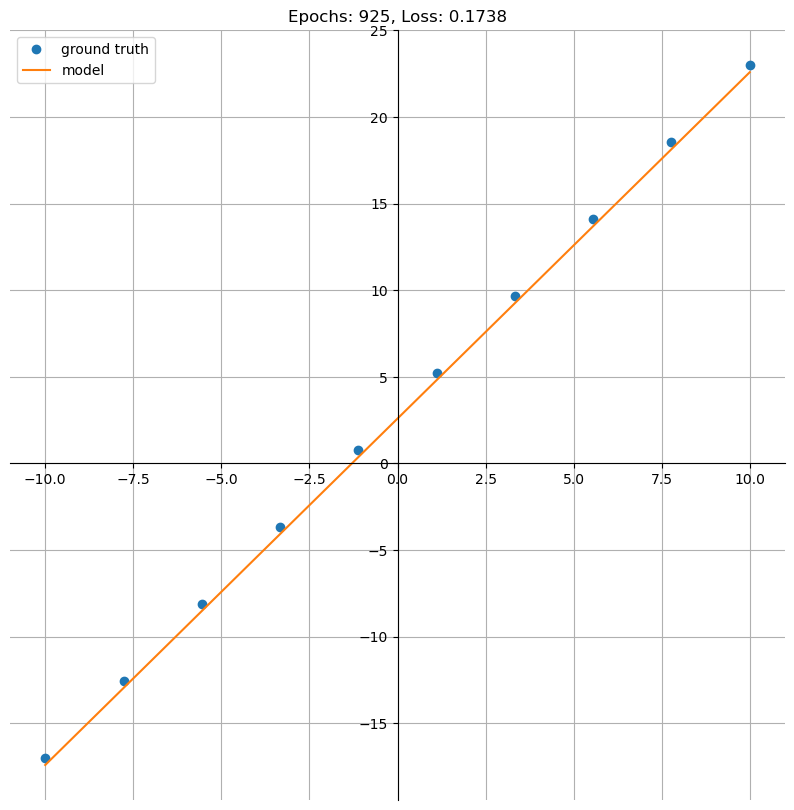

Epoch: 950; Train Loss: 0.15721572935581207


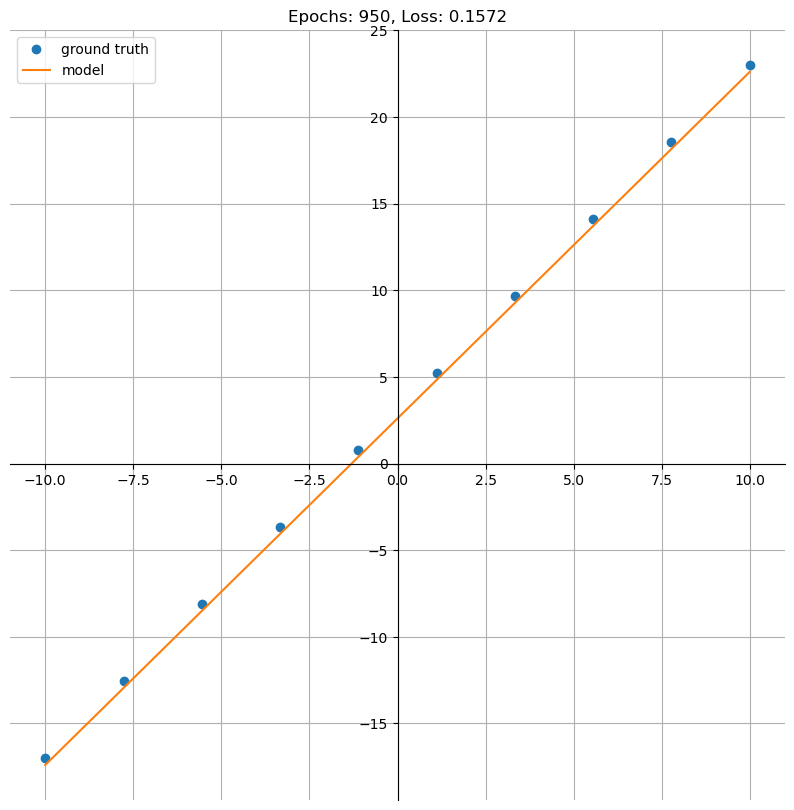

Epoch: 975; Train Loss: 0.14224044978618622


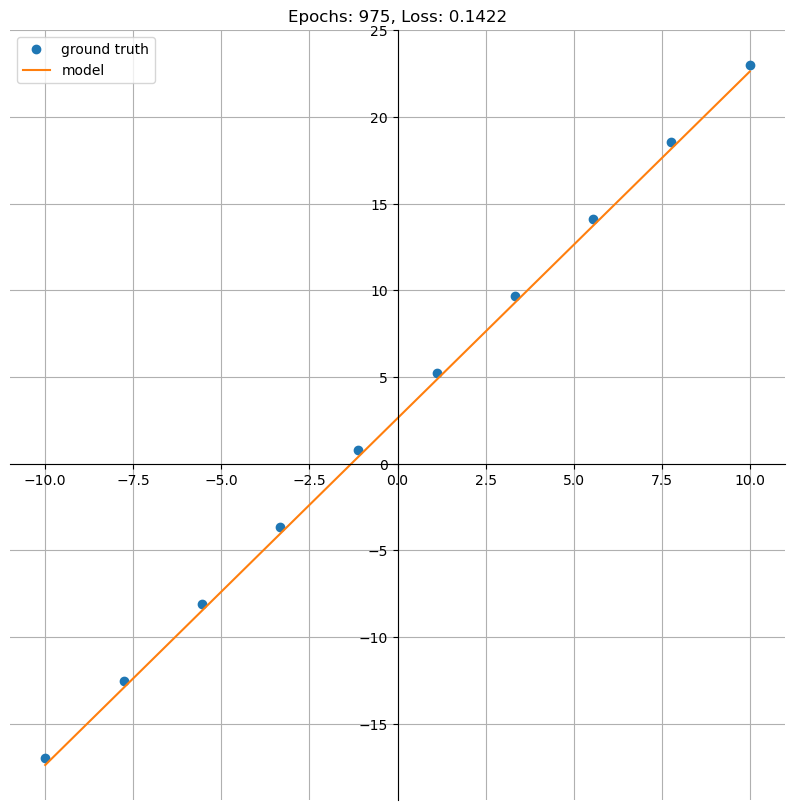

Epoch: 1000; Train Loss: 0.12869180738925934


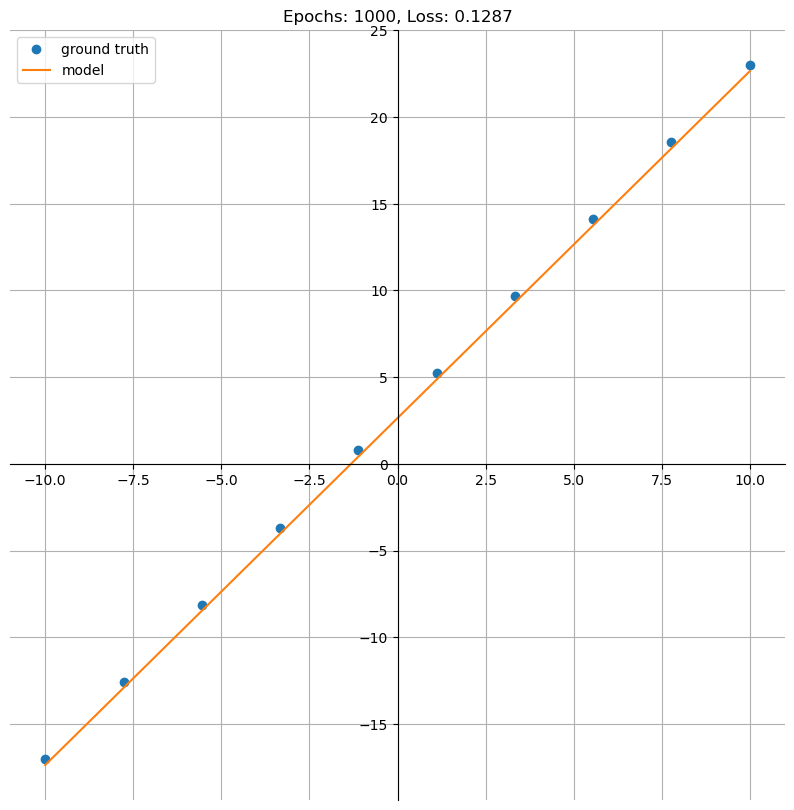

Test Loss: 0.12816321849822998


In [398]:
epochs = 1001

# Let''s make a Gif of the training
filename_output = "./line_approximation.gif"
writer = imageio.get_writer(filename_output, mode='I', duration=0.3)

model.train()
for t in range(epochs):
  train_loss = train(model, train_dataloader, lossfunc, optimizer)
  if t % 25 == 0:
    print(f"Epoch: {t}; Train Loss: {train_loss}")
    image = plot_comparison(line, model, epoc=t, loss=train_loss)
    # appending to gif
    writer.append_data(image)

test_loss = test(model, test_dataloader, lossfunc)
print(f"Test Loss: {test_loss}")
writer.close()

## **Task 5** (1 pt) **Describe what you observed during the experiments:**

It is definitely easier and very practical to use pytorch instead of implementing it with numpy!

I would also like to point out that with the number of epochs set to 1001, the model is more likely to converge since than a smaller number like 100, as I had experimented with at the simple perceptron. 

In my experiments, I noticed that after a few tries my model converged extremely rapidly, at epoch 0! This raised suspicion to something wrong in the code... I wondered whether the model could have learned from the final result at the first time that I ran the cells, since on the first time I ran them, the model had not converged at the first epoch... 
So I decided to shake things up by adding a reLU activation function after the Linear(1,1) layer and it worked! As the ground truth needs a straight line that contains values below 0, a reLU activation function is inappropriate so I removed it. I then ran the cells again and found that now the model does not converge at the first epoch, yay! The model now is quite far from the ground truth at epoch 0, but epoch 25 is already way closer. It's interesting to notice that the biggest progress was indeed achieved from epoch 0 to epoch 25. The epochs ahead get progressively but slowly closer to the ground truth and therefore, a few more epochs would be useful. The test loss was equal to the last train loss and smaller than all others, only .13 away from the ground truth.


REFERÊNCIAS:

https://www.thomascountz.com/2018/04/05/19-line-line-by-line-python-perceptron

https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-predict-new-samples-with-your-pytorch-model.md

chatGPT utilizado para debugar erros do código - https://chat.openai.com/

Videoaulas e grupos da disciplina
